# Data Analysis with Python 
## House Sales in King County, USA
#### This project creates a model to predict the price of houses in King County, USA.

### Data cleaning

#### Loading Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Loading Data

In [4]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Checking for data types

In [5]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [19]:
#Changing the data types of date
df[["date"]] = df[["date"]].astype("datetime64")
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

#### Checking for missing data

In [20]:
missing_data = df.isnull() 
missing_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
for column in missing_data.columns.values.tolist(): 
    print(column)
    print (missing_data[column].value_counts()) 
    print(' ')

id
False    21613
Name: id, dtype: int64
 
date
False    21613
Name: date, dtype: int64
 
price
False    21613
Name: price, dtype: int64
 
bedrooms
False    21613
Name: bedrooms, dtype: int64
 
bathrooms
False    21613
Name: bathrooms, dtype: int64
 
sqft_living
False    21613
Name: sqft_living, dtype: int64
 
sqft_lot
False    21613
Name: sqft_lot, dtype: int64
 
floors
False    21613
Name: floors, dtype: int64
 
waterfront
False    21613
Name: waterfront, dtype: int64
 
view
False    21613
Name: view, dtype: int64
 
condition
False    21613
Name: condition, dtype: int64
 
grade
False    21613
Name: grade, dtype: int64
 
sqft_above
False    21613
Name: sqft_above, dtype: int64
 
sqft_basement
False    21613
Name: sqft_basement, dtype: int64
 
yr_built
False    21613
Name: yr_built, dtype: int64
 
yr_renovated
False    21613
Name: yr_renovated, dtype: int64
 
zipcode
False    21613
Name: zipcode, dtype: int64
 
lat
False    21613
Name: lat, dtype: int64
 
long
False    21613
Name: long

#### Dealing with missing data

bedrooms:
 - There are 13 missing values in the column bedrooms. We can replace these values by highly repeated number of bedrooms.
 
bathrooms:
- There are 10 missing values in the column bathrooms. We can replace these values by highly repeated number of bathrooms.

In [22]:
# Countinig bedrooms
df['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9837
4.0,6882
2.0,2760
5.0,1601
6.0,272
1.0,199
7.0,38
8.0,13
9.0,6
10.0,3


In [23]:
# Countinig bedrooms
df['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5390
1.00,3852
1.75,3048
2.25,2047
2.00,1930
1.50,1446
2.75,1185
3.00,753
3.50,731
3.25,589


The mostly repeated bedroom is 3 and the mostly repeated bathroom is 2.5. So we are going to replace all the missing values of the column 'bedrooms' by 3 and all the missing values of the column 'bathrooms' by 2.5.

In [24]:
# Replacing missing values in bedrooms by 3
df['bedrooms'].replace(np.nan, 3, inplace = True)

In [25]:
# Replacing missing values in bathrooms by 2.5
df['bathrooms'].replace(np.nan, 2.5, inplace = True)

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Summary statistics of the data

In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372646,2.115914,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926423,0.768862,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Normalizing the data
Normalization is the process of transforming values of several variables into a similar range. Here our normalizations include scaling  variable so the variable values range from 0 to 1

In [29]:
# Normalizing columns "sqft_living", "width" and "height"
# replace (original value) by (original value)/(maximum value)
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max() 
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max() 
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max() 
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max() 

In [30]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372646,2.115914,0.153612,0.009148,1.494309,0.007542,0.234303,3.409430,7.656873,0.190052,0.060479,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926423,0.768862,0.067832,0.025083,0.539989,0.086517,0.766318,0.650743,1.175459,0.088001,0.091821,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,0.021418,0.000315,1.000000,0.000000,0.000000,1.000000,1.000000,0.030818,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,0.105391,0.003052,1.000000,0.000000,0.000000,3.000000,7.000000,0.126461,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,0.141064,0.004613,1.500000,0.000000,0.000000,3.000000,7.000000,0.165781,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,0.188331,0.006472,2.000000,0.000000,0.000000,4.000000,8.000000,0.234857,0.116183,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1.000000,1.000000,3.500000,1.000000,4.000000,5.000000,13.000000,1.000000,1.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now data looks good. We are going to work on further analysis of the data.

### Explotory Data Analysis

As a part of data analysis, first we find the relationships between the variables.

In [31]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001327,0.005245,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308868,0.525649,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001327,0.308868,1.000000,0.513944,0.578147,0.032253,0.177803,-0.006778,0.080031,0.026898,0.356770,0.479287,0.303001,0.155635,0.018506,-0.153678,-0.009650,0.130862,0.393319,0.030310
bathrooms,0.005245,0.525649,0.513944,1.000000,0.755216,0.087931,0.502213,0.063720,0.188380,-0.126371,0.664371,0.686227,0.283259,0.506886,0.050509,-0.204915,0.024178,0.225180,0.569404,0.087572
sqft_living,-0.012258,0.702035,0.578147,0.755216,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.032253,0.087931,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.177803,0.502213,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006778,0.063720,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.080031,0.188380,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.026898,-0.126371,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [32]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525649
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

From the above correlation matrix, we see that the highly related variables with price are: floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15,   sqft_above, grade, sqft_living. So our study will mostly focus with these variables.

In [33]:
# Countinig grade
df['grade'].value_counts().to_frame()

,grade
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29
13,13


In [19]:
# Countinig view
df['view'].value_counts().to_frame()

,view
0,19489
2,963
3,510
1,332
4,319


In [20]:
# Countinig waterfront
df['waterfront'].value_counts().to_frame()

,waterfront
0,21450
1,163


In [21]:
# Countinig floors
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


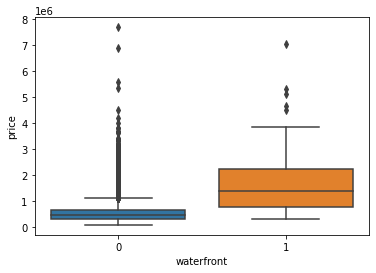

In [22]:
sns.boxplot(x="waterfront", y="price", data=df)

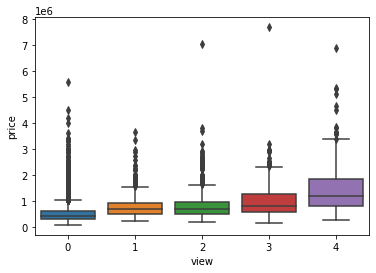

In [23]:
sns.boxplot(x="view", y="price", data=df)

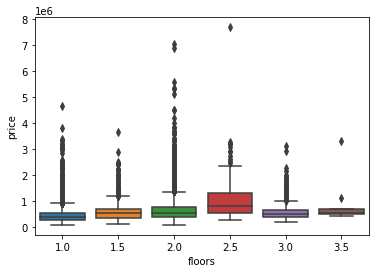

In [24]:
sns.boxplot(x="floors", y="price", data=df)

Text(0.5, 1.0, 'sqft_living bins')

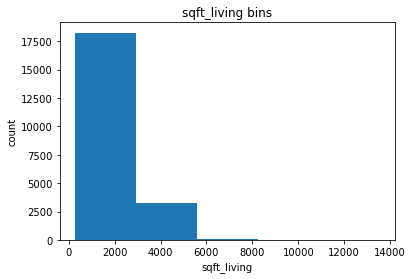

In [26]:
# draw historgram of attribute "qft_living" with bins = 5
plt.hist(df["sqft_living"], bins = 5)
plt.xlabel("sqft_living") 
plt.ylabel("count") 
plt.title("sqft_living bins")

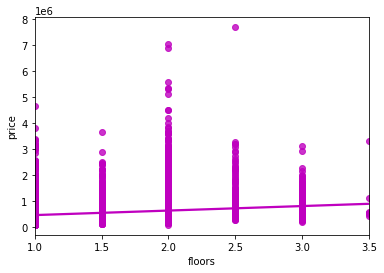

In [31]:
sns.regplot(x="floors", y="price", data=df, color = 'm')

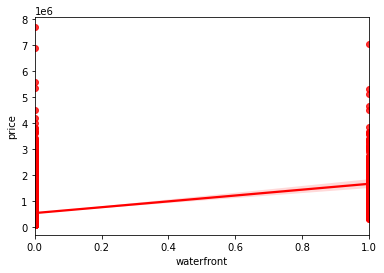

In [32]:
sns.regplot(x="waterfront", y="price", data=df, color = 'r')

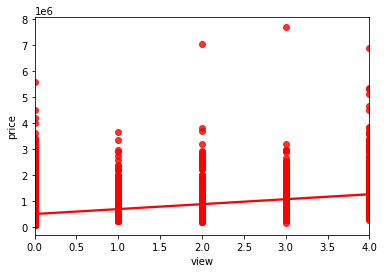

In [33]:
sns.regplot(x="view", y="price", data=df, color = 'r')

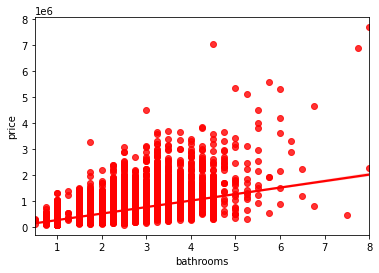

In [35]:
sns.regplot(x="bathrooms", y="price", data=df, color = 'r')

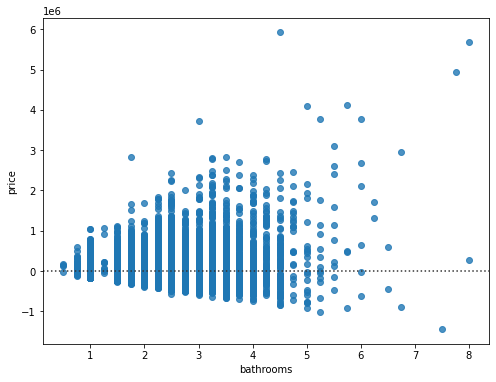

In [36]:
plt.figure(figsize=(8, 6)) 
sns.residplot(df['bathrooms'], df['price']) 
plt.show()

#### Polynomial regression for bathrooms

In [38]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): 
    x_new = np.linspace(0, 8, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-') 
    plt.title('Polynomial Fit with Matplotlib for Price ~ bathroom')
    #ax = plt.gca()
    #ax.set_facecolor((0.898, 0.898, 0.898))
    #fig = plt.gcf() 
    plt.xlabel(Name) 
    plt.ylabel('Price of House')
    plt.show() 
    plt.close()
 

In [39]:
x = df['bathrooms'] 
y = df['price']
f = np.polyfit(x, y, 5) 
p = np.poly1d(f) 
print(p)

      5             4             3             2
3090 x - 5.936e+04 x + 4.113e+05 x - 1.188e+06 x + 1.601e+06 x - 4.197e+05


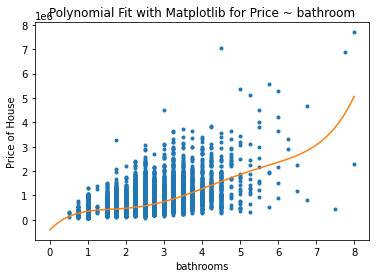

In [40]:
PlotPolly(p, x, y, 'bathrooms')

In [41]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.3403622747483117


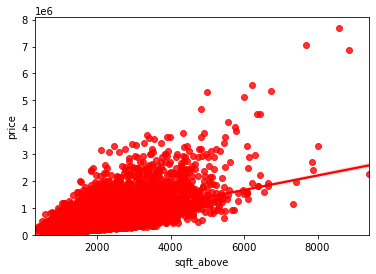

In [43]:
# Linear regression again
sns.regplot(x="sqft_above", y="price", data=df, color = 'r')
plt.ylim(0,)
plt.show()

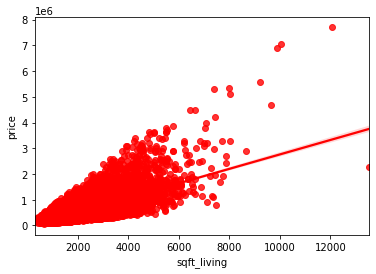

In [35]:
sns.regplot(x="sqft_living", y="price", data=df, color = 'r')

### Model Development


In [44]:
X = df[['long']] 
Y = df['price']
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [45]:
X = df[['waterfront']] 
Y = df['price']
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y)

0.07095267538578309

In [46]:
X = df[['bathrooms']] 
Y = df['price']
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y)

0.27630712122096013

In [47]:
X = df[['sqft_above']] 
Y = df['price']
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y)

0.3667117528382793

In [48]:
X = df[['sqft_living']] 
Y = df['price']
lm = LinearRegression() 
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

Let us fit a linear regression model to predict the 'price' using the list of following features:

In [49]:
features =["floors", "waterfront", "lat" , "bedrooms" , "sqft_basement" , "view" , "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living" ]


In [50]:
X1 = df[features] 
Y1 = df['price']
lm = LinearRegression() 
lm.fit(X1,Y1)
lm.score(X1,Y1)

0.6576974981681714

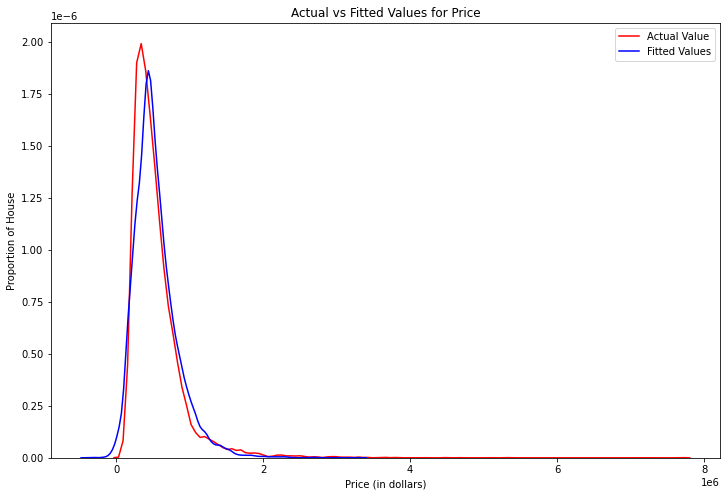

In [51]:
Yhat = lm.predict(X1)
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
ax1 = sns.distplot(Yhat, hist=False, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('Price (in dollars)') 
plt.ylabel('Proportion of House')
plt.show() 
plt.close()

#### Pipeline

In [53]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [54]:
pipe=Pipeline(Input) 
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
pipe.fit(X1,Y1)
pipe.score(X1, Y1)

0.7496316144555242

In [56]:
ypipe=pipe.predict(X1) 
ypipe[0:4]

array([353988., 568040., 451028., 397436.])

In [57]:
#Another for sqft_living
pipe.fit(X,Y)
pipe.score(X, Y)

0.5327430940591443

#### Training and Testing


In [58]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [59]:
X1 = df[features]
Y1 = df['price']
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


In [60]:
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train, y_train) 
RigeModel.score(x_test, y_test)

0.6459293522480061

In [61]:
pr=PolynomialFeatures(degree=2) 
x_train_pr=pr.fit_transform(x_train[features]) 
x_test_pr=pr.fit_transform(x_test[features])
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train_pr, y_train) 
RigeModel.score(x_test_pr, y_test)

0.754314949875095

#### Another way

In [62]:
from sklearn.model_selection import train_test_split
y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4323
number of training samples: 17290


In [63]:
lm=LinearRegression()
lm.fit(x_train[['sqft_living']], y_train)

LinearRegression()

In [64]:
lm.score(x_test[['sqft_living']], y_test)

0.5033019006466924

In [65]:
lm.score(x_train[['sqft_living']], y_train)

0.48876078213887486